# Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

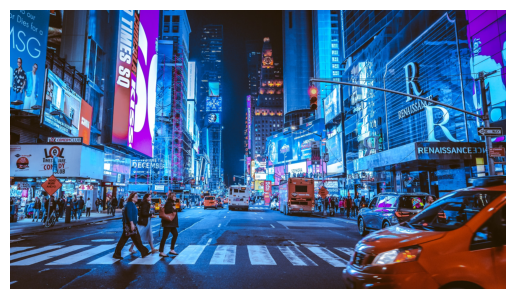

In [7]:
%matplotlib inline
# Load and review the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('New York.jpeg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
# Reshape the image for k-means clustering
import numpy as np
image_reshape = image.reshape(-1, 3)
print("image: {}".format(image.shape))
print("image reshape: {}".format(image_reshape.shape))

image: (1161, 2064, 3)
image reshape: (2396304, 3)


In [9]:
# Run k-means clustering on reshaped image
from sklearn.cluster import KMeans
k = 4
model_km = KMeans(n_clusters=k, random_state=42)
model_km.fit(image_reshape)

KMeans(n_clusters=4, random_state=42)

In [10]:
# Print cluster centers and construct compressed image
palette = model_km.cluster_centers_
labels = model_km.labels_
compressed_image = palette[labels].astype('uint8')
print("Palette (Cluster Centers):")
print(palette)
print("compressed image: {}".format(compressed_image.shape))

Palette (Cluster Centers):
[[146.9647043  190.80338012 230.98884606]
 [ 58.97619035  37.38825697  37.22700728]
 [ 38.82300718  64.03127035 129.09184565]
 [ 28.8348191  126.88254259 208.31739579]]
compressed image: (2396304, 3)


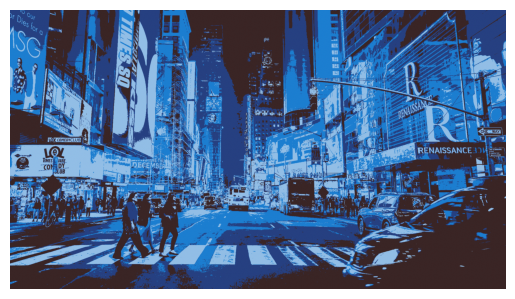

In [11]:
# Show the compressed image
compressed_image = compressed_image.reshape(image.shape)
plt.imshow(compressed_image / 255.)
plt.axis('off')
plt.show()

In [12]:
# Optional: Save the compressed image
mpimg.imsave('compressed_New_York.jpeg', compressed_image / 255.)